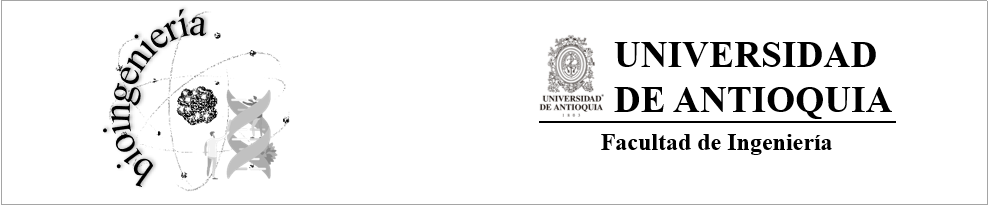

# Regresión Logística

A partir de un conjunto de datos de entrada (características), para obtener una salida discreta (y no continua) se utiliza $Regresión\ Logística$ (y no Regresión Lineal). La $Regresión\ Logística$ es un Algoritmo <u>Supervisado</u> y se utiliza para <u>clasificación</u>.


<b>RECORDEMOS</b>:
Los problemas de clasificación con dos posibles estados “SI/NO”: $binario$ o un número finito de “etiquetas” o “clases”: $múltiple$. Algunos Ejemplos de Regresión Logística son:


1. Clasificar si el correo que llega es Spam o No es Spam
2. Dada un imagen médica, clasificar si hay presencia cáncer o no.
3. El texto de una noticia es de: Entretenimiento, Deportes, Política o Ciencia y tecnología.
4. A partir del historial bancario de una persona aprobar un crédito o no.

<div align="center">
    
# $P(y\ =\ categorical | x ; w)$

Es la probabilidad de obtener una salida $Y$ categórica teniendo como entrada las $x$ y $w$
<br><br>

En términos generales, si se generaliza el problema multidimensional, se tiene la forma:

# $y\ =\ W^T·X$
<br><br>
# $W^T\ =\ [w_0\ \ w_1\ \ w_2 ... ]\ ·\ X\ =\ \begin{bmatrix} 1\\ x_1\\ x_2\\ .\\ .\\ .\end{bmatrix}$
<br>

# $y\ =\ w_0\ +\ w_1·x_1\ +\ w_2·x_2\ +\ ...\ +\ w_p·x_p$
    


### Debido a que es un probabilidad, entonces se necesita que la salida esté entre 0 y 1, para esto se utiliza la $Función\ sigmoidal$

<div align="center">

# $\sigma(x) = \frac{1} {(1 + e^{-x})}$

entonces;

# $\sigma(W^T·X) = \frac{1} {(1 + e^{-W^T·X})}$
    


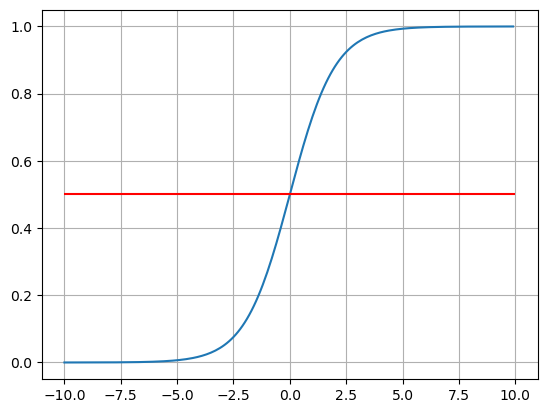

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):
    sig = 1 / (1 + np.exp(-x))
    return sig

x = np.arange(-10,10,.1)
y = sigmoid(x)

plt.plot(x,y)
plt.hlines(y=.5 , xmin=-10 , xmax=10 , color='red')
plt.grid()
plt.show()


<div align="center">
    
# $P(y\ =\ 1 | X ; W)\ =\ \sigma(W^T·X)$
    
## y
    
# $P(y\ =\ 0 | X ; W)\ =\ 1\ -\ \sigma(W^T·X)$

\[
P(y = k \mid X; W) =
\begin{cases}
1 & \text{si } \sigma(W^T X) \geq 0.5 \\
0 & \text{si } \sigma(W^T X) < 0.5 \\
\end{cases}
\]

donde $\sigma(W^T X)$ es la función sigmoide.

# Ejercicio práctico usando Regresión Logística

Clasificar si el usuario que visita un sitio web usa como sistema operativo Windows, macOS o Linux.

La información de entrada son 4 características tomadas de una web que utiliza Google Analytics y son:

1. <b>time</b>: Duración de la visita en Segundos
2. <b>pages</b>: Cantidad de Páginas Vistas durante la Sesión
3. <b>actions</b>: Cantidad de Acciones del usuario (clic, scroll, uso de checkbox, sliders, etc)
4. <b>values</b>: Suma del Valor de las acciones (cada acción lleva asociada una valoración de importancia)

Como la salida es discreta, asignaremos los siguientes valores a las etiquetas:

0 – Windows<br>
1 – macOS<br>
2 – Linux<br>

Tamaño del archivo: 170 registros

### 1. Importación de las librerías a usar

In [2]:
#Librerías para la carga , visualización y operación de los datos.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split , cross_val_score , KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

### 2. Carga del Dataset

In [3]:
!wget https://raw.githubusercontent.com/angelower/infomed20251/main/data/usuarios_win_mac_lin.csv

df = pd.read_csv("usuarios_win_mac_lin.csv")
df.head()

--2025-05-06 12:29:32--  https://raw.githubusercontent.com/angelower/infomed20251/main/data/usuarios_win_mac_lin.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2332 (2.3K) [text/plain]
Saving to: ‘usuarios_win_mac_lin.csv’

usuarios_win_mac_li 100%[===================>]   2.28K  --.-KB/s    in 0s      

2025-05-06 12:29:32 (7.94 MB/s) - ‘usuarios_win_mac_lin.csv’ saved [2332/2332]



,time,pages,actions,values,op
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


### 3. Análisis descriptivo

In [4]:
df.describe()

,time,pages,actions,values,op
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


In [5]:
print('*** MUESTRAS POR CLASE ***')
print(df.groupby('op').size())

*** MUESTRAS POR CLASE ***
op
0    86
1    40
2    44
dtype: int64


*** ANÁLISIS DE FRECUENCIA DE LAS VARIABLES INDEPENDIENTES ***


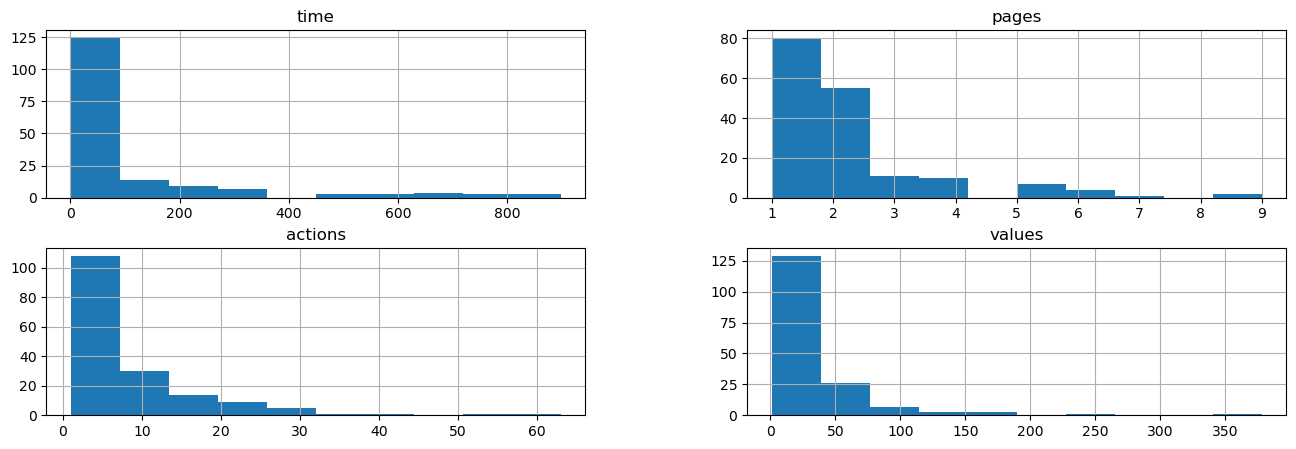

In [34]:
%matplotlib inline
print('*** ANÁLISIS DE FRECUENCIA DE LAS VARIABLES INDEPENDIENTES ***')
df.drop(['op'], axis=1).hist(figsize=(16,5))
plt.show()

### 4. Creación del modelo de Regresión Logística

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

#### Preparación del dataset

In [10]:
df.head()

,time,pages,actions,values,op
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [11]:
X = np.array(df.drop(['op'],axis=1))
y = np.array(df['op'])
print(f'Tamaño del conjunto de variables independientes: {X.shape}')
print(f'Tamaño del conjunto de variables dependientes: {y.shape}')

Tamaño del conjunto de variables independientes: (170, 4)
Tamaño del conjunto de variables dependientes: (170,)


#### Creación de la instancia del modelo

In [12]:
model = LogisticRegression(solver='liblinear')
model.fit(X,y)

LogisticRegression(solver='liblinear')

In [13]:
X

array([[  7.   ,   2.   ,   4.   ,   8.   ],
       [ 21.   ,   2.   ,   6.   ,   6.   ],
       [ 57.   ,   2.   ,   4.   ,   4.   ],
       [101.   ,   3.   ,   6.   ,  12.   ],
       [109.   ,   2.   ,   6.   ,  12.   ],
       [125.   ,   5.   ,  10.   ,  20.   ],
       [133.   ,   2.   ,   2.   ,   4.   ],
       [162.   ,   2.   ,   6.   ,  12.   ],
       [170.   ,   2.   ,   4.   ,   8.   ],
       [217.   ,   2.   ,   6.   ,   6.   ],
       [266.   ,   2.   ,   6.   ,  12.   ],
       [335.   ,   4.   ,  12.   ,  24.   ],
       [553.   ,   4.   ,  12.   ,  24.   ],
       [798.   ,   5.   ,  15.   ,  15.   ],
       [872.   ,   2.   ,   6.   ,   6.   ],
       [  1.105,   2.   ,   4.   ,   8.   ],
       [  2.091,   5.   ,   5.   ,   5.   ],
       [ 21.   ,   2.   ,   4.   ,  12.   ],
       [ 33.   ,   2.   ,   8.   ,  48.   ],
       [ 49.   ,   2.   ,   8.   ,  32.   ],
       [ 74.   ,   2.   ,   6.   ,  18.   ],
       [ 93.   ,   2.   ,  12.   ,  96.   ],
       [14

IMPORTANTE: para un dataset pequeño, la documentación recomienda que de use el parámetro $solver="liblinear"$

### 5. Evaluación de predicción del modelo

In [14]:
predictions = model.predict(X)
print(predictions[0:50])

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 2 2
 2 2 2 0 0 0 1 0 1 0 1 0 0]


In [16]:
model.score(X,y)

0.7764705882352941

In [17]:
y[0:50]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0])

# Validación del modelo

### 1. Separación de las muestras en _entrenamiento_ $train$ y _prueba_ $test$

Generalmente se hace un split de 70% 0 80% para train (entrenamiento) y 20% o 30% para test (validacion). Esto se especifica en la variable `test_size`

La semilla `seed` hace que cada vez que se entrene, se use los mismos sets de entrenamiento y validación en caso de que se haga un cambio de hiperparametros

In [18]:
test_size = 0.20
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X
                                                    , y
                                                    , test_size=test_size
                                                    , random_state=seed)

In [19]:
X_train.shape

(136, 4)

In [20]:
X_train

array([[ 11.   ,   1.   ,   5.   ,  15.   ],
       [ 12.   ,   1.   ,   2.   ,   4.   ],
       [  2.695,   9.   ,  18.   ,  36.   ],
       [ 13.   ,   1.   ,   5.   ,  25.   ],
       [ 12.   ,   1.   ,   4.   ,  16.   ],
       [ 11.   ,   1.   ,   6.   ,  24.   ],
       [739.   ,   5.   ,  15.   ,  15.   ],
       [266.   ,   2.   ,   4.   ,  12.   ],
       [ 12.   ,   1.   ,   8.   ,  24.   ],
       [117.   ,   5.   ,  40.   , 240.   ],
       [ 13.   ,   1.   ,   4.   ,  12.   ],
       [ 30.   ,   2.   ,   6.   ,  18.   ],
       [125.   ,   5.   ,  10.   ,  20.   ],
       [ 21.   ,   2.   ,   4.   ,  12.   ],
       [ 13.   ,   1.   ,   4.   ,  12.   ],
       [304.   ,   2.   ,  18.   ,  54.   ],
       [116.   ,   2.   ,  16.   ,  64.   ],
       [  1.   ,   2.   ,  18.   ,  36.   ],
       [146.   ,   2.   ,  14.   ,  28.   ],
       [674.   ,   3.   ,  18.   ,  72.   ],
       [ 13.   ,   1.   ,   4.   ,  24.   ],
       [ 11.   ,   1.   ,   2.   ,  10.   ],
       [ 1

In [24]:
X_test.shape

(34, 4)

### 2. Validación cruzada

In [25]:
kfold = KFold(n_splits=5)
cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
print(f"Logistic Regression: {cv_results.mean()} ({cv_results.std()})")

Logistic Regression: 0.7283068783068783 (0.08804239163611864)


`n_splits` son las iteraciones que se van a realizar. El valor debe ser entre 5 y 10

In [26]:
cv_results

array([0.67857143, 0.7037037 , 0.74074074, 0.88888889, 0.62962963])

In [27]:
cv_results.mean()

0.7283068783068783

### 3. Se hace la predicción con el modelo entrenado

In [28]:
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8529411764705882


In [29]:
# Predicción
y_pred

array([1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 1, 0, 2, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2])

In [30]:
# Etiqueta real
y_test

array([1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 0, 1, 1, 0, 2, 2, 2, 2,
       0, 0, 0, 2, 1, 2, 0, 0, 0, 1, 0, 2])

### 4. Gráfica de la matriz de confusión

In [31]:
print(confusion_matrix(y_test, y_pred))

[[16  0  2]
 [ 3  3  0]
 [ 0  0 10]]


In [32]:
print(classification_report(y_test, y_pred , target_names=['Win' , 'Mac' , 'Linux'] ))

              precision    recall  f1-score   support

         Win       0.84      0.89      0.86        18
         Mac       1.00      0.50      0.67         6
       Linux       0.83      1.00      0.91        10

    accuracy                           0.85        34
   macro avg       0.89      0.80      0.81        34
weighted avg       0.87      0.85      0.84        34



<b><u>precision</u></b>: capacidad del clasificador de <b>no</b> etiquetar como positiva una muestra que es negativa.<br>
<b><u>recall</u></b>: capacidad del clasificador de encontrar todas las muestras positivas.<br>
<b><u>f1-score</u></b>: combinación de las métricas precisión y recall, donde 1 es el mejor resultado y 0 es el peor.

### 5. Otra forma de ver la matriz de confusión

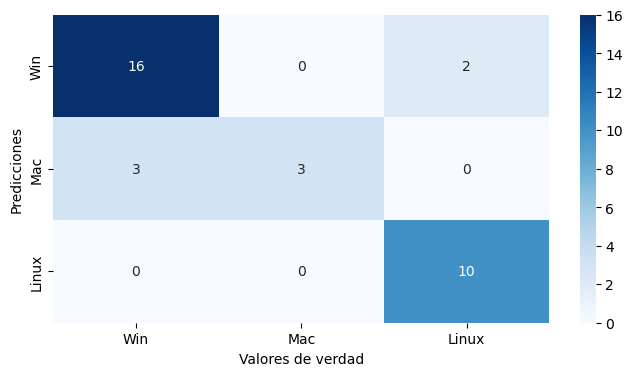

In [33]:
import seaborn as sns

labels = ['Win' , 'Mac' , 'Linux']
cm = confusion_matrix(y_test, y_pred )
fig , ax = plt.subplots(figsize=(8,4))
sns.heatmap(cm ,cmap='Blues',annot=True , xticklabels=labels, yticklabels=labels)
plt.xlabel('Valores de verdad')
plt.ylabel('Predicciones')
plt.show()

### 6. Hagamos la predicción de muestras nuevas.

In [35]:
X_new = pd.DataFrame([[10, 3, 5, 9]])
model.predict(X_new)

array([2])

In [ ]:
model.predict_proba(X_new) # Probabilidades de pertenencia a cada clase

array([[0.25537217, 0.09593959, 0.64868824]])

In [37]:
X_new2 = pd.DataFrame([[15, 5, 7, 19]])
model.predict(X_new2)

array([0])

In [38]:
model.predict_proba(X_new2)

array([[0.61745989, 0.35801858, 0.02452153]])

In [39]:
X_new3 = np.array([15, 10, 1, 19]).reshape(1,-1)

model.predict(X_new3)

array([1])

In [40]:
model.predict_proba(X_new3)

array([[4.88463562e-03, 9.95113416e-01, 1.94806288e-06]])

# Detallemos el entrenamiento con el $KFold$

In [41]:
from sklearn.model_selection import KFold , cross_val_score

In [42]:
kfold = KFold(n_splits=5)

for train, test in kfold.split(X, y):
    print(f'train -  {np.bincount(y[train])}   |   test -  {np.bincount(y[test])}')
    cv_results = cross_val_score(model, X[train], y[train], scoring='accuracy' )
    print(f"Logistic Regression: {cv_results.mean()} ({cv_results.std()})\n")


train -  [86 23 27]   |   test -  [ 0 17 17]
Logistic Regression: 0.7494708994708994 (0.07308293829763823)

train -  [67 30 39]   |   test -  [19 10  5]
Logistic Regression: 0.6928571428571428 (0.11985148933849184)

train -  [59 35 42]   |   test -  [27  5  2]
Logistic Regression: 0.8238095238095238 (0.05321604639441337)

train -  [80 32 24]   |   test -  [ 6  8 20]
Logistic Regression: 0.7060846560846561 (0.08019146484411939)

train -  [52 40 44]   |   test -  [34]
Logistic Regression: 0.7494708994708994 (0.045265160998913395)



# Entrenamiento con el $KFold$ estratificado

Garantiza porcentajes iguales de las clases en los sets de datos

In [43]:
from sklearn.model_selection import StratifiedKFold

In [44]:
skf = StratifiedKFold(n_splits=5)
for train, test in skf.split(X, y):
    print(f'train -  {np.bincount(y[train])}   |   test -  {np.bincount(y[test])}')
    cv_results = cross_val_score(model, X[train], y[train], scoring='accuracy' )
    print(f"Logistic Regression: {cv_results.mean()} ({cv_results.std()})\n")

train -  [69 32 35]   |   test -  [17  8  9]
Logistic Regression: 0.7439153439153439 (0.10716604360780665)

train -  [69 32 35]   |   test -  [17  8  9]
Logistic Regression: 0.7648148148148148 (0.07934920476158722)

train -  [69 32 35]   |   test -  [17  8  9]
Logistic Regression: 0.7645502645502645 (0.038519099943283154)

train -  [69 32 35]   |   test -  [17  8  9]
Logistic Regression: 0.7571428571428571 (0.04534240272090696)

train -  [68 32 36]   |   test -  [18  8  8]
Logistic Regression: 0.7497354497354497 (0.08635205929512525)



In [45]:
# Predicción de muestras nuevas
X_new = pd.DataFrame([[10, 3, 5, 9]])
model.predict(X_new)

array([2])

In [46]:
# Score de predicción de las muestras nuevas (test)
y_pred = model.predict(X[test])
print(accuracy_score(y[test], y_pred))

0.7647058823529411


## Matriz de confusión

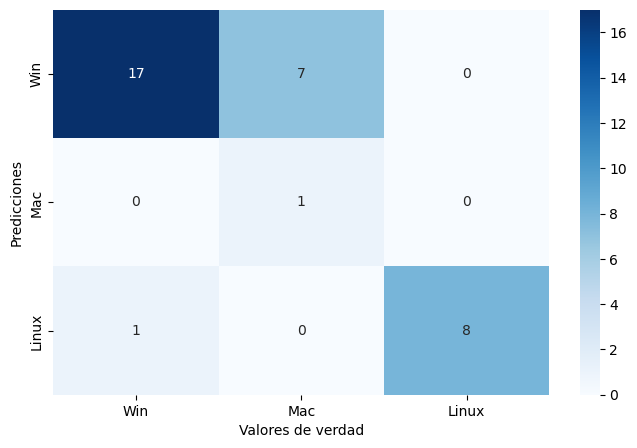

In [48]:
labels = ['Win' , 'Mac' , 'Linux']
cm = confusion_matrix( y_pred , y[test] )
fig , ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm ,cmap='Blues',annot=True , xticklabels=labels, yticklabels=labels)
plt.xlabel('Valores de verdad')
plt.ylabel('Predicciones')
plt.show()